**Task**: The exercise will address Absenteeism at a company during work time.

**Definition**: Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

**Reasons for absenteeism**: The problem is that the work environment of today is more:

* Competitive
* Managers set unachievable business goals
* have an elevated risk of becoming unemployed This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.

### Dataset description
<hr style="border:1px solid gray"> </hr>
The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

### Feature Information:
<hr style="border:1px solid gray"> </hr>

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories as follows:

    1. Certain infectious and parasitic diseases
    2. Neoplasms
    3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    4. Endocrine, nutritional and metabolic diseases
    5. Mental and behavioural disorders
    6. Diseases of the nervous system
    7. Diseases of the eye and adnexa
    8. Diseases of the ear and mastoid process
    9. Diseases of the circulatory system
    10. Diseases of the respiratory system
    11. Diseases of the digestive system
    12. Diseases of the skin and subcutaneous tissue
    13. Diseases of the musculoskeletal system and connective tissue
    14. Diseases of the genitourinary system
    15. Pregnancy, childbirth and the puerperium
    16. Certain conditions originating in the perinatal period
    17. Congenital malformations, deformations and chromosomal abnormalities
    18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    19. Injury, poisoning and certain other consequences of external causes
    20. External causes of morbidity and mortality
    21. Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


Source: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score

### Pipeline for completing the task
<hr style="border:1px solid gray"> </hr>

1. Load the data
2. Preprocessing the data
3. Exploratory Analysis
4. Data preparation
5. Building models
6. Evaluating the models
7. Model comparison
8. Conclusion

### 1. Load the data
<hr style="border:1px solid gray"> </hr>

In [3]:
df = pd.read_csv('data.csv',sep = ';')

### 2. Preprocessing the data
<hr style="border:1px solid gray"> </hr>

In [8]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### 3. Exploratory Analysis
<hr style="border:1px solid gray"> </hr>

In [12]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


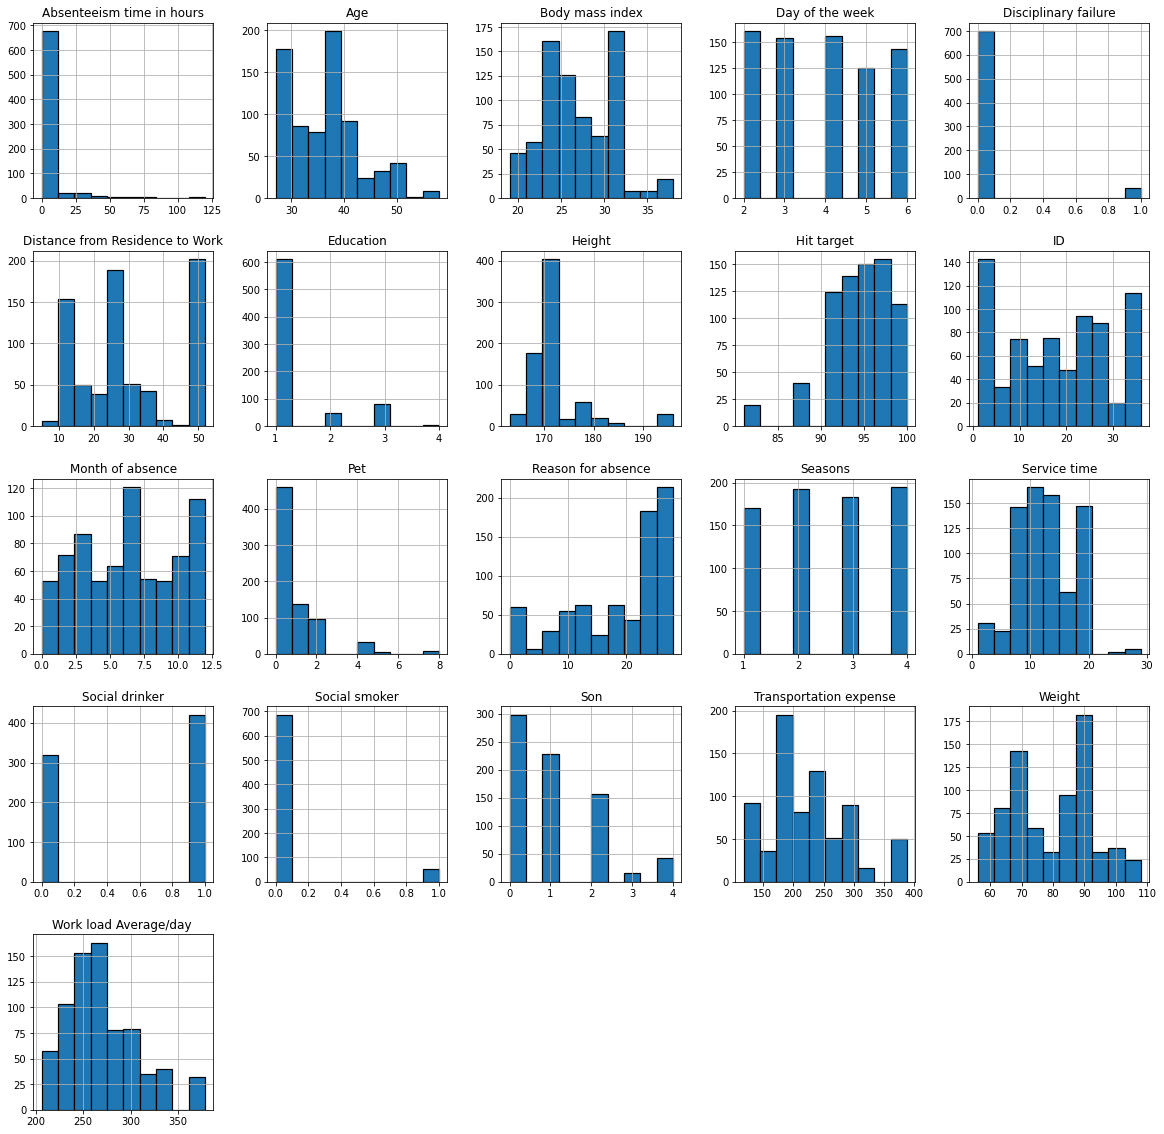

In [13]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

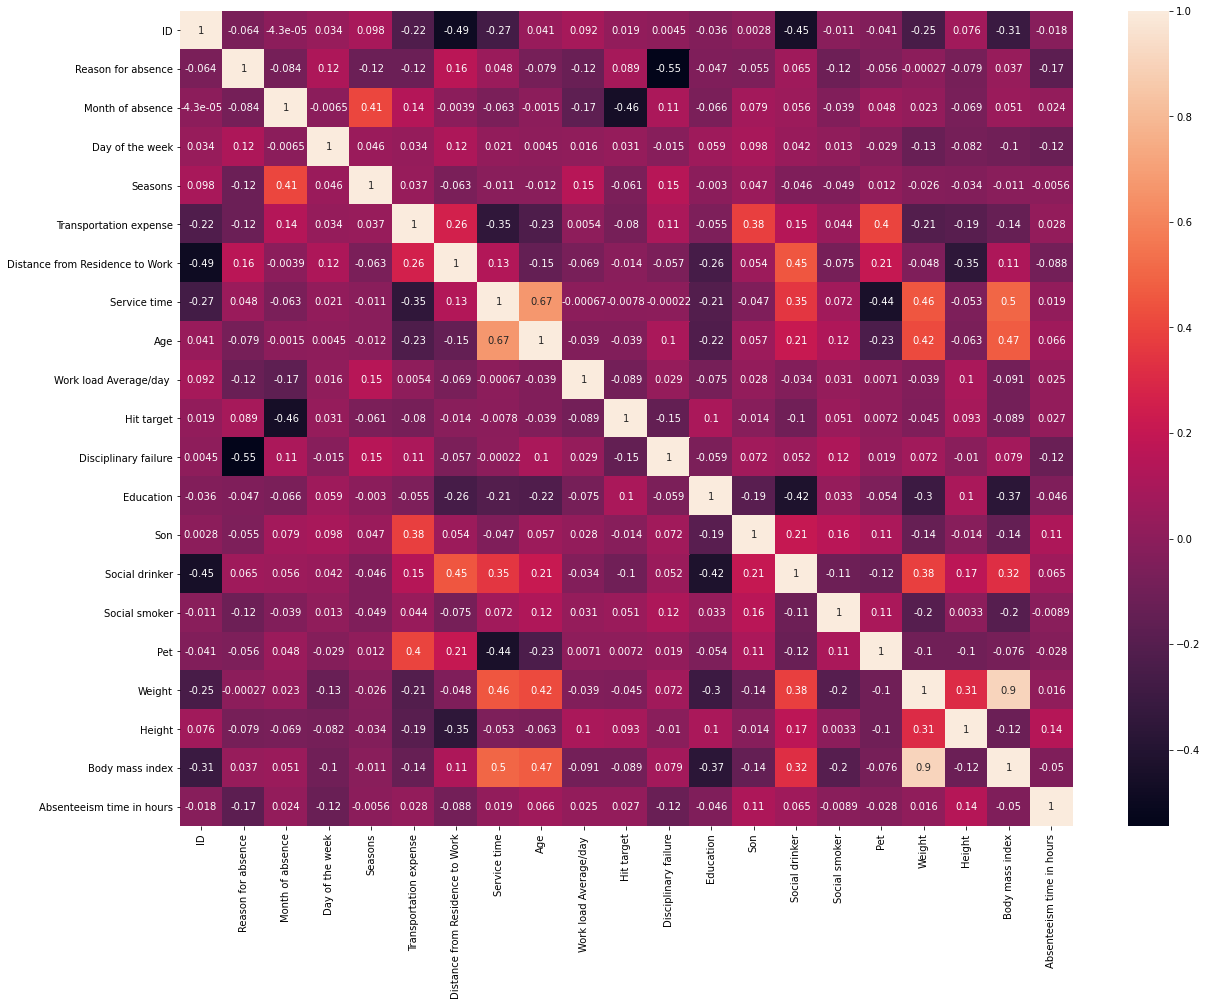

In [16]:
plt.figure(figsize=(20, 15))
sb.heatmap(df.corr(), annot=True)
plt.show()

### 4. Data Preparation
<hr style="border:1px solid gray"> </hr>

In [4]:
#lets get rid of the `ID` column
del df['ID']

In [5]:
# Divide the dataframe into Dependent and Independent variables

#Independent Variables
X = df.loc[:, df.columns != 'Absenteeism time in hours']

#Dependent Variables
y = np.where(df['Absenteeism time in hours']>df['Absenteeism time in hours'].median(),1,0)

In [6]:
# Split the X,y into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5. Building models
<hr style="border:1px solid gray"> </hr>

#### Logistic Regression

In [18]:
# Fit the classification model
logistic = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train, y_train)

#### Random Forest

In [14]:
# n_estimators = [100, 500, 1000, 1500]
# max_features = ['auto', 'sqrt']
# max_depth = [2, 5, 10, 15, None]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# criterion = ['gini', 'entropy']

# params_grid = {
#     'n_estimators': n_estimators, 
#     'max_features': max_features,
#     'max_depth': max_depth, 
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf, 
#     'bootstrap': bootstrap
# }

# rf_clf = RandomForestClassifier(random_state=42)

# rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best parameters: {best_params}")
best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000)

#### XGBoost

In [16]:
# n_estimators = [50, 100, 250]
# max_depth = [2, 3, 5, 10, 15]
# base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
# learning_rate = [0.05, 0.1, 0.5, 0.9, 1]
# min_child_weight = [1, 2, 3, 4]
# subsample = [0.5, 0.75, 0.85, 0.9, 1]
# colsample_bytree = [0.5, 0.75, 0.85, 0.9, 1]
# colsample_bynode = [0.5, 0.75, 0.85, 0.9, 1]
# colsample_bylevel = [0.5, 0.75, 0.85, 0.9, 1]

# params_grid = {
#     'n_estimators': n_estimators, 
#     'max_depth': max_depth,
#     'learning_rate' : learning_rate, 
#     'min_child_weight' : min_child_weight, 
#     'base_score' : base_score,
#     'subsample': subsample,

# }

# xgb_clf = xgb.XGBClassifier()

# xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'f1',n_jobs =-1, verbose=1)


# xgb_cv.fit(X_train, y_train)
# best_params = xgb_cv.best_params_
# print(f"Best paramters: {best_params}")
best_params = {'base_score': 0.99, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 0.9}
xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.99, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 6. Evaluating the models

In [9]:
def evalution(model,X,y):
    y_pred = model.predict(X)

    report = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y, y_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y, y_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{report}")

#### Logistic Regression

In [19]:
# Classification report on testing set
evalution(logistic,X_test,y_test)

CONFUSION MATRIX:
[[108  28]
 [ 38  71]]
ACCURACY SCORE:
0.7306
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.739726    0.717172  0.730612    0.728449      0.729692
recall       0.794118    0.651376  0.730612    0.722747      0.730612
f1-score     0.765957    0.682692  0.730612    0.724325      0.728913
support    136.000000  109.000000  0.730612  245.000000    245.000000


#### Random Forest

In [15]:
# Classification report on testing set
evalution(rf,X_test,y_test)

CONFUSION MATRIX:
[[103  33]
 [ 29  80]]
ACCURACY SCORE:
0.7469
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.780303    0.707965  0.746939    0.744134      0.748120
recall       0.757353    0.733945  0.746939    0.745649      0.746939
f1-score     0.768657    0.720721  0.746939    0.744689      0.747330
support    136.000000  109.000000  0.746939  245.000000    245.000000


#### XGBoost

In [17]:
# Classification report on testing set
evalution(xgb_clf,X_test,y_test)

CONFUSION MATRIX:
[[105  31]
 [ 21  88]]
ACCURACY SCORE:
0.7878
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.739496  0.787755    0.786415      0.791585
recall       0.772059    0.807339  0.787755    0.789699      0.787755
f1-score     0.801527    0.771930  0.787755    0.786728      0.788359
support    136.000000  109.000000  0.787755  245.000000    245.000000


### 7. Model Comparison

([<matplotlib.axis.XTick at 0x7fd2f9acf760>,
 [Text(0, 0, 'logistic'), Text(0, 0, 'rf'), Text(0, 0, 'xgboost')])

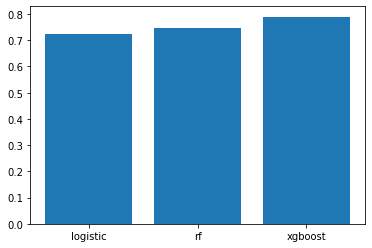

In [22]:
auc = {}
# AUC for logistic regression
auc['logistic'] = roc_auc_score(y_test, logistic.predict(X_test))

# AUC for random forest
auc['rf'] = roc_auc_score(y_test, rf.predict(X_test))

# AUC for XGBoost
auc['xgboost'] = roc_auc_score(y_test, xgb_clf.predict(X_test))

# convert the dictionary to dataframe and plot the results
plt.bar(range(len(auc)), list(auc.values()), align='center')
plt.xticks(range(len(auc)), list(auc.keys()))

### 8. Conclusion

We want to conclude by stating that XGBoost performs the best for the given task. It successfully classifies the absenteesim with 78.8% accuracy which better than both random forest classifier and logistic regression. 